In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_json("gme.json")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


the variables found in this data set are 
date, which is the day we observe the stock, 
open, the price of the stock when the market opens, 
high, the highest recoorded price, 
low, the lowest recorded price, 
close, the price when the market closes, 
adj close, which is adjusted price of a stock when the market closes. 
and volume, the number of stocks being traded in

In [3]:
df[df["High"] == df ["High"].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [4]:
count = 0
total = 0
for month in range(1, 13):
    for i in range(len(df)):
        if df.loc[i]["Date"].month == month:
            avg = (df.loc[i]["High"] + df.loc[i]["Low"]) / 2
            total += avg
            count += 1
total/count

9.233137054107122

In [5]:
df.loc[0]["Date"].day

13

<AxesSubplot:xlabel='Volume', ylabel='Low'>

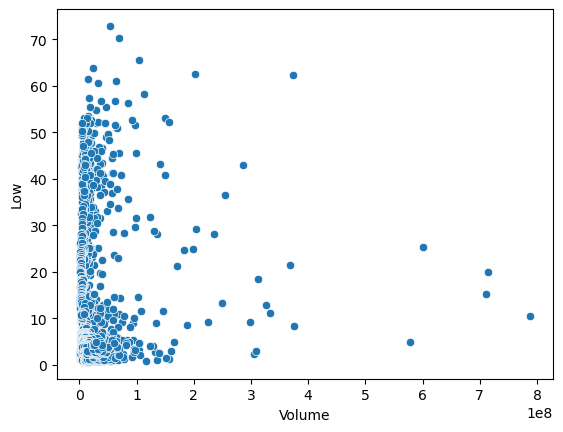

In [6]:
sns.scatterplot(data=df, x="Volume", y="Low")

In [7]:
df["Low"].corr(df["Volume"])

0.10259646883179027

<AxesSubplot:xlabel='Date', ylabel='High'>

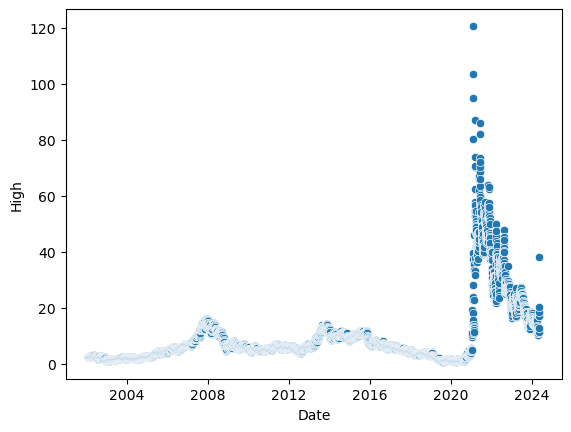

In [8]:
sns.scatterplot(data=df, x="Date", y="High")

<AxesSubplot:xlabel='Date', ylabel='Log High'>

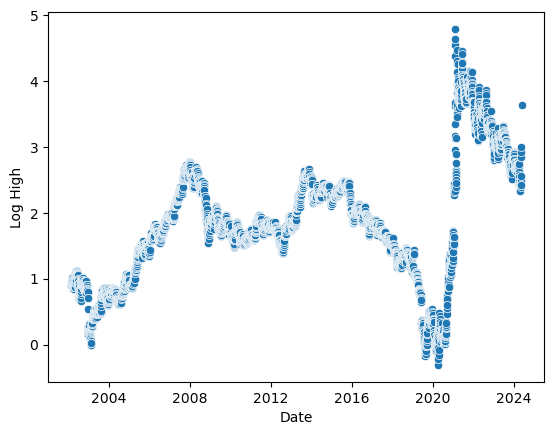

In [9]:
log_high = np.log(df["High"])
df["Log High"] = log_high
sns.scatterplot(data=df, x="Date", y="Log High")

In [10]:
df['numeric_time'] = pd.to_datetime(df['Date']).astype('int64') // 10**9  # Converts to seconds since epoch
correlation = df['numeric_time'].corr(df['Log High'])

In [11]:
correlation

0.45097470030936626